In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [18]:
health_data = pd.read_csv('health_data.csv')
health_data.head()

,patient_id,hospital_id,admin_year,patient_died_dummy,startage,female_dummy
0,1,D,2003,0,81,0
1,2,H,2003,1,67,0
2,3,A,2003,0,54,0
3,4,E,2003,0,81,0
4,5,H,2003,0,69,0


In [19]:
print(health_data.dtypes)

patient_id             int64
hospital_id           object
admin_year             int64
patient_died_dummy     int64
startage               int64
female_dummy           int64
dtype: object


# Part 1: Hospital admission & quality of service

### Question 1 Answer 

We start by regressing the patient-died dummy variable on a set of hospital dummies


In [20]:
mortality_reg  = smf.ols(formula = 'patient_died_dummy ~ hospital_id',data=health_data) 
result = mortality_reg .fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     patient_died_dummy   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     119.3
Date:                Mon, 24 Jan 2022   Prob (F-statistic):          1.75e-220
Time:                        16:14:54   Log-Likelihood:                -7416.5
No. Observations:               24480   AIC:                         1.485e+04
Df Residuals:                   24470   BIC:                         1.493e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0970      0.006  

**(a)** The intercept can be interpreted as the mortality rate of hospital A. Dummy coefficient for hospital D is the difference in mortality rates at hospital D and hopital A.

**(b)**  The difference between the mortality rate at hospital D and E is the difference between coefficients of hospital D (0.188) and hopital E (-0.053). Hospital D has a 24.1 percentage points greater mortality rate than hospital E.

## Causal interpretation (or lack thereof)

### Question 2 Answer 


In [22]:
mortality_reg_two_hospitals  = smf.ols(formula = 'patient_died_dummy ~ hospital_id',data = health_data, subset =(health_data['hospital_id']=="A")|(health_data['hospital_id']=="B")) 
result = mortality_reg_two_hospitals .fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     patient_died_dummy   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9377
Date:                Mon, 24 Jan 2022   Prob (F-statistic):              0.333
Time:                        16:15:32   Log-Likelihood:                -1446.8
No. Observations:                6611   AIC:                             2898.
Df Residuals:                    6609   BIC:                             2911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0970      0.005  

**(a)** Patients with different levels of severity (and thus different probabilities of death) might go to different hospitals.

**(b)** More difficult cases are likely to be treated at the higher quality hospital. This will lead to an underestimation of the true difference in mortality.

**(c)** We control  for age and gender:

In [24]:
mortality_reg_controls   = smf.ols(formula = 'patient_died_dummy ~ hospital_id + startage + female_dummy',data = health_data, subset =(health_data['hospital_id']=="A")|(health_data['hospital_id']=="B")) 
result = mortality_reg_controls.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     patient_died_dummy   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     147.6
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           1.43e-92
Time:                        16:33:43   Log-Likelihood:                -1232.8
No. Observations:                6611   AIC:                             2474.
Df Residuals:                    6607   BIC:                             2501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1165      0.027  

After controlling for age and gender, the difference between hospitals A and B increases. Age and gender can serve as proxy for severity of the case, but they are likely to only partially capture case severity.

# Part 2: Demand Estimation

### Question 1 Answer 

In [28]:
demand_data = pd.read_csv("demand_data.csv") 
demand_data.head()

,vendor_id,week,summer_dummy,price,sales
0,1,1,0,2.0,8788.7383
1,1,2,0,3.0,8937.9863
2,1,3,0,3.0,8740.1777
3,1,4,0,3.0,8757.1338
4,1,5,0,3.0,8739.6104


In [27]:
print(demand_data.dtypes)

vendor_id         int64
week              int64
summer_dummy      int64
price           float64
sales           float64
dtype: object


In [35]:
# vendor 1 regression w/o summer control 
vendor1_univar_reg = smf.ols(formula="sales ~ price", data = demand_data[demand_data["vendor_id"]==1])
result =  vendor1_univar_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.3250
Date:                Mon, 24 Jan 2022   Prob (F-statistic):              0.571
Time:                        16:50:54   Log-Likelihood:                -360.33
No. Observations:                  52   AIC:                             724.7
Df Residuals:                      50   BIC:                             728.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8983.8227    145.437     61.771      0.0

In [36]:
# vendor 1 regression with summer control 
vendor1_summer_reg = smf.ols(formula="sales ~ price + summer_dummy", data = demand_data[demand_data["vendor_id"]==1])
result = vendor1_summer_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     11.42
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           8.49e-05
Time:                        16:51:01   Log-Likelihood:                -350.56
No. Observations:                  52   AIC:                             707.1
Df Residuals:                      49   BIC:                             713.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     9177.5500    128.432     71.458   

Demand and prices are higher in summer. Hence the price coefficient is biased upwards when not controlling for the summer dummy.

### Question 2 Answer 

In [37]:
# vendor 2 regression w/o summer control 
vendor2_univar_reg = smf.ols(formula="sales ~ price", data = demand_data[demand_data["vendor_id"]==2])
result =  vendor2_univar_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     7.684
Date:                Mon, 24 Jan 2022   Prob (F-statistic):            0.00781
Time:                        16:55:42   Log-Likelihood:                -359.10
No. Observations:                  52   AIC:                             722.2
Df Residuals:                      50   BIC:                             726.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8411.1748    219.545     38.312      0.0

In [40]:
# vendor 2 regression with summer control 
vendor2_summer_reg = smf.ols(formula="sales ~ price + summer_dummy", data = demand_data[demand_data["vendor_id"]==2])
result = vendor2_summer_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     7.684
Date:                Mon, 24 Jan 2022   Prob (F-statistic):            0.00781
Time:                        16:56:31   Log-Likelihood:                -359.10
No. Observations:                  52   AIC:                             722.2
Df Residuals:                      50   BIC:                             726.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2105.3159     29.848     70.534   

Price only takes on two values, one during summer and one outside of summer. Hence the summer dummy and price are perfectly correlated and cannot be estimated separately.

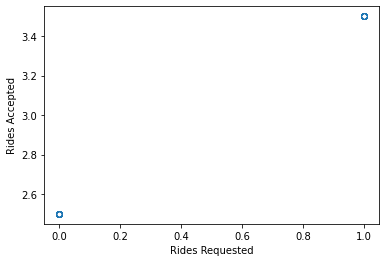

In [41]:
x = demand_data[demand_data["vendor_id"]==2]['summer_dummy']
y = demand_data[demand_data["vendor_id"]==2]['price']
plt.plot(x, y, 'o',mfc = 'none') #scatter plot
plt.xlabel("Rides Requested")
plt.ylabel("Rides Accepted")
plt.show()

In [42]:
# We can also compute the correlations
np.corrcoef(x, y)

array([[1., 1.],
       [1., 1.]])

### Question 3 Answer 
Omitted variable bias does not occur because price is uncorrelated with the summer dummy. Including the summer dummy control is still helpful to improve the precision of the estimate.